# **Analysis of Credit Score Classification**

### 1. Problem definition

The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### 2. Data

It's public dataset extracted from: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

### 3. Evaluation

I'll try to reach ~90% accuracy at predicting whether or not a person are avaible to has a credit, so i'll try to discard the `poor` classifications

### 4. Featuring


* ID: Represents a unique identification of an entry
* Customer_ID: Represents a unique identification of a person
* Month: Represents the month of the year
* Name: Represents the name of a person
* Age: Represents the age of the person
* SSN: Represents the social security number of a person
* Occupation: Represents the occupation of the person
* Annual_Income: Represents the annual income of the person
* Monthly_Inhand_Salary: Represents the monthly base salary of a person
* Num_Bank_Accounts: Represents the number of bank accounts a person holds
* Num_Credit_Card: Represents the number of other credit cards held by a person
* Interest_Rate: Represents the interest rate on credit card
* Num_of_Loan: Represents the number of loans taken from the bank
* Type_of_Loan: Represents the types of loan taken by a person
* Delay_from_due_date: Represents the average number of days delayed from the payment date
* Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
* Changed_Credit_Limit: Represents the percentage change in credit card limit
* Num_Credit_Inquiries: Represents the number of credit card inquiries
* Credit_Mix: Represents the classification of the mix of credits
* Outstanding_Debt: Represents the remaining debt to be paid (in USD)
* Credit_Utilization_Ratio: Represents the utilization ratio of credit card
* Credit_History_Age: Represents the age of credit history of the person
* Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
* Total_EMI_per_month: Represents the monthly EMI payments (in USD)
* Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
* Payment_Behaviour: Represents the payment behavior of the customer (in USD)
* Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

### 4. Preparing the tools

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation.

### 5. Modeling

In [201]:
# Import all the tools we need

# Regular EDA (exploratory Data analysis) and plotting libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plot to appear inside the notebook.
%matplotlib inline

# Models from Scickit-Learn
from sklearn.preprocessing import LabelEncoder as le
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

### Load data

In [2]:
df_tr = pd.read_csv('train.csv',
                 low_memory=False)
df_tr.shape #(rows, columns)

(100000, 28)

# Data Exploration (exploratory data analysis or EDA)

In [3]:
df_tr.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
# Let's see how many samples we have in our dataframe
df_tr.Credit_Score.value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

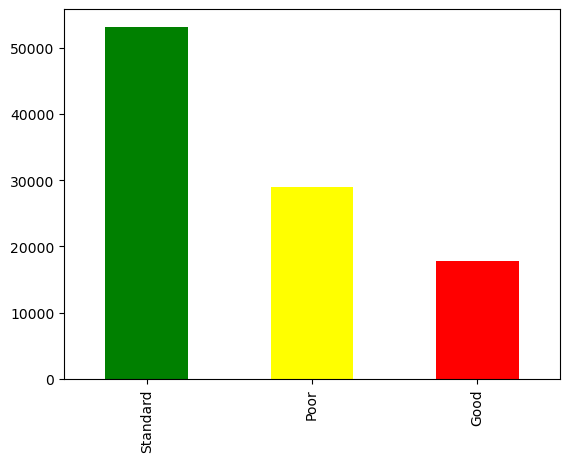

In [5]:
df_tr['Credit_Score'].value_counts().plot(kind='bar', color=['green', 'yellow', 'red']);

## Comapre target column with ser column

In [9]:
pd.crosstab(df_tr.Credit_Score, df_tr.Credit_Mix)

Credit_Mix,Bad,Good,Standard,_
Credit_Score,,,,
Good,288,11875,2043,3622
Poor,11409,3861,7859,5869
Standard,7292,8601,26577,10704


## I want to define a binary classification

In [13]:
df_tr.replace(to_replace= 'Poor', value = 0, inplace=True )
df_tr.replace(to_replace= 'Standard', value = 1, inplace=True )
df_tr.replace(to_replace= 'Good', value = 1, inplace=True )
df_tr.Credit_Score.value_counts(normalize=True)

1    0.71002
0    0.28998
Name: Credit_Score, dtype: float64

### Plot the value counts with a bar graph

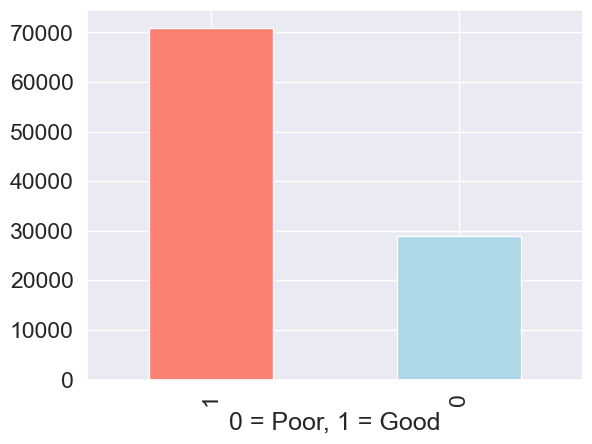

In [207]:
df_tr.Credit_Score.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xlabel('0 = Poor, 1 = Good');

In [14]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [15]:
df_tr.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000
Credit_Score,100000.0,0.710020,0.453755,0.000000,0.000000,1.000000,1.000000,1.000000


## Are there any missing values?

In [16]:
df_tr.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Hands on the data

In [17]:
rows = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
        'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
        'Monthly_Balance']
pd.set_option('mode.chained_assignment', None)

In [19]:
for row in rows:
    df_tr[row] = df_tr[row].str.replace(r'_+', '')

C:\Users\Hernan Delaunay\AppData\Local\Temp\ipykernel_8616\1687199533.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tr[row] = df_tr[row].str.replace(r'_+', '')


In [20]:
for row in rows:
    df_tr[row] = pd.to_numeric(df_tr[row], errors='coerce')

In [13]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

In [21]:
data = df_tr.copy()

# Handle missing values

In [22]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [16]:
data['Age'] = data.Age.astype(int)

In [27]:
data['ID'] = data.ID.apply(lambda x: int(x))

In [29]:
data['Customer_ID'] = data.Customer_ID.apply(lambda x: int(x[4:], 16))

In [30]:
data['Month'] = pd.to_datetime(data.Month, format='%B').dt.month

In [31]:
data['Annual_Income'] = data.Annual_Income.astype(float)

In [32]:
data['Num_of_Loan'] = data.Num_of_Loan.astype(int) 

In [33]:
data['Num_of_Delayed_Payment'] = data.Num_of_Delayed_Payment.astype(float)

In [34]:
data['Changed_Credit_Limit'] = data.Changed_Credit_Limit.astype(float)

In [35]:
data['Outstanding_Debt'] = data.Outstanding_Debt.astype(float)

In [36]:
data['Amount_invested_monthly'] = data.Amount_invested_monthly.astype(float)

In [37]:
data['Monthly_Balance'] = data.Monthly_Balance.astype(float)

In [38]:
fill_list = data['Credit_History_Age'].dropna().tolist()
data['Credit_History_Age'] = data['Credit_History_Age'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

In [39]:
fill_list = data['Amount_invested_monthly'].dropna().tolist()
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

In [40]:
fill_list = data['Monthly_Balance'].dropna().tolist()
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

In [41]:
data['Name'].fillna(method='ffill', inplace=True)

In [42]:
data['Monthly_Inhand_Salary'].fillna(data['Monthly_Inhand_Salary'].mean(), inplace=True)

In [43]:
data['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)

In [44]:
data['Num_of_Delayed_Payment'].fillna(data['Num_of_Delayed_Payment'].median(), inplace=True)

In [45]:
data['Changed_Credit_Limit'].fillna(data['Changed_Credit_Limit'].median(), inplace=True)

In [46]:
data['Num_Credit_Inquiries'].fillna(data['Num_Credit_Inquiries'].median(), inplace=True)

In [47]:
Credit_History_Age_le = le()
data['Credit_History_Age'] = Credit_History_Age_le.fit_transform(data['Credit_History_Age'])

In [48]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Now that all of the data is numeric, as well as our data frame has no missing values, we should be able to build a machine learning model.

Saving & reloading

In [49]:
# Export current DataFrame
data.to_csv('train_pr.csv',
              index=False)

In [50]:
# Import preprocessed data
df_tr_pr = pd.read_csv('train_pr.csv',
                      low_memory=False)

# Handle Outliers Values

In [51]:
data.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,180,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,5635,3392,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.170850,3,...,1,809.98,31.94496,346,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1


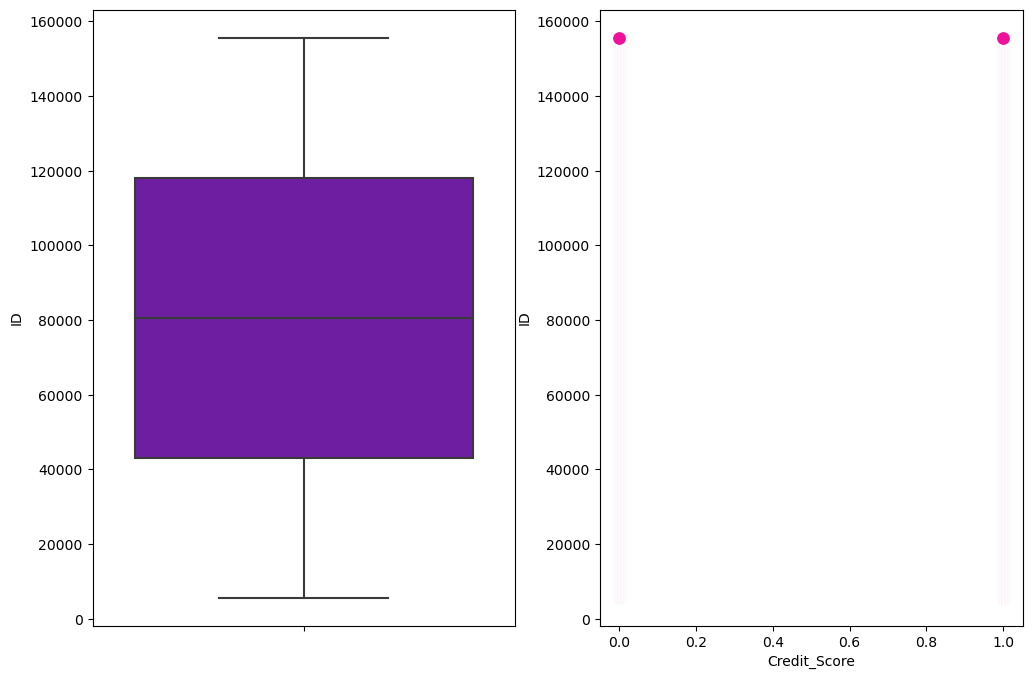

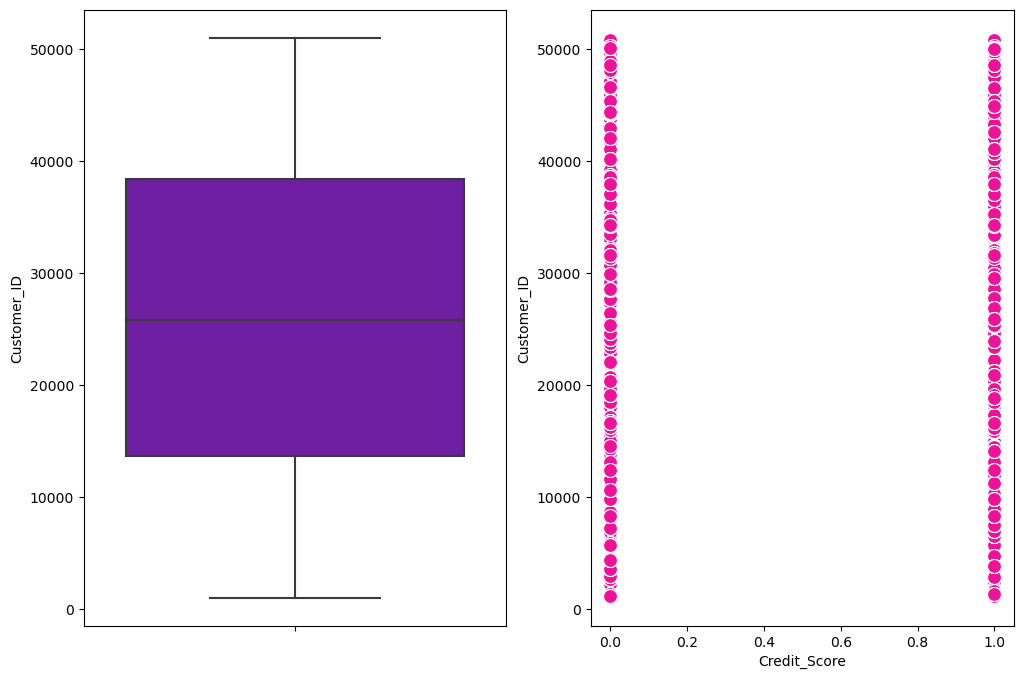

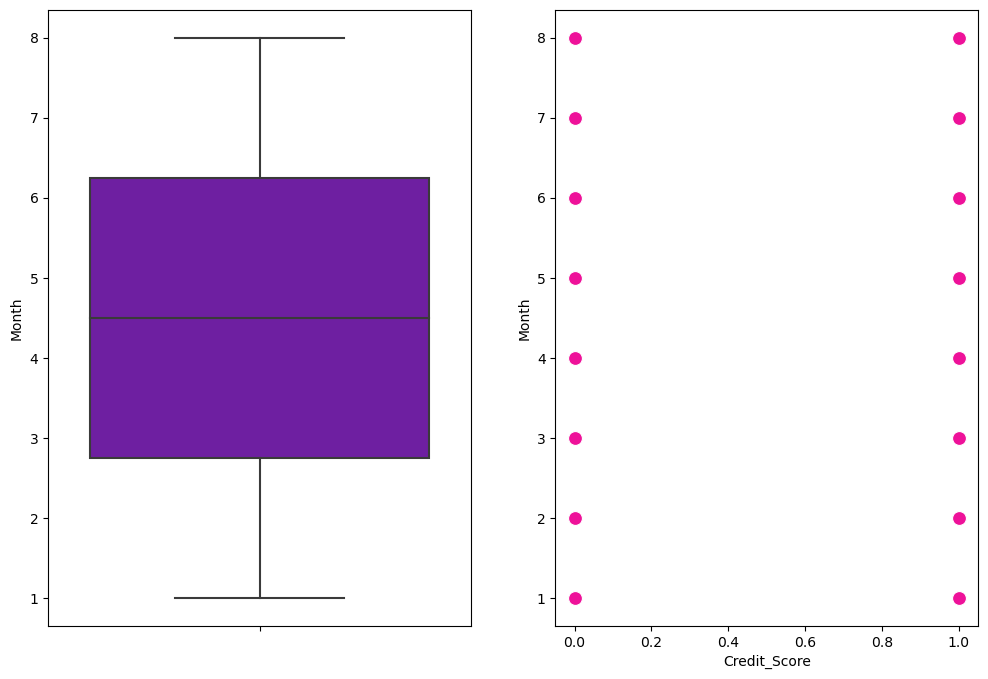

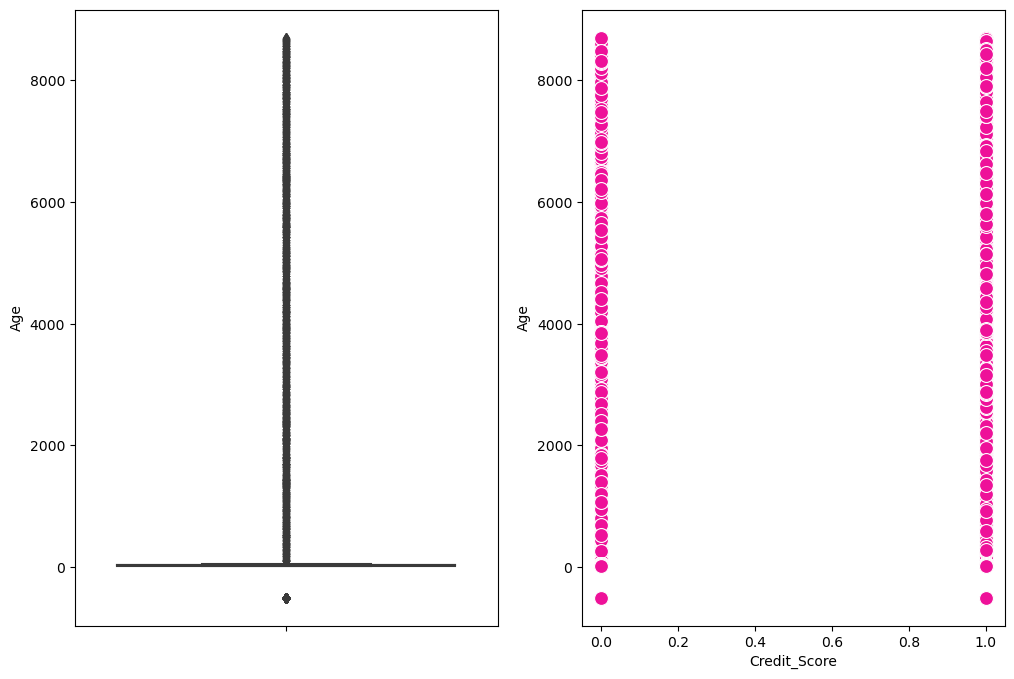

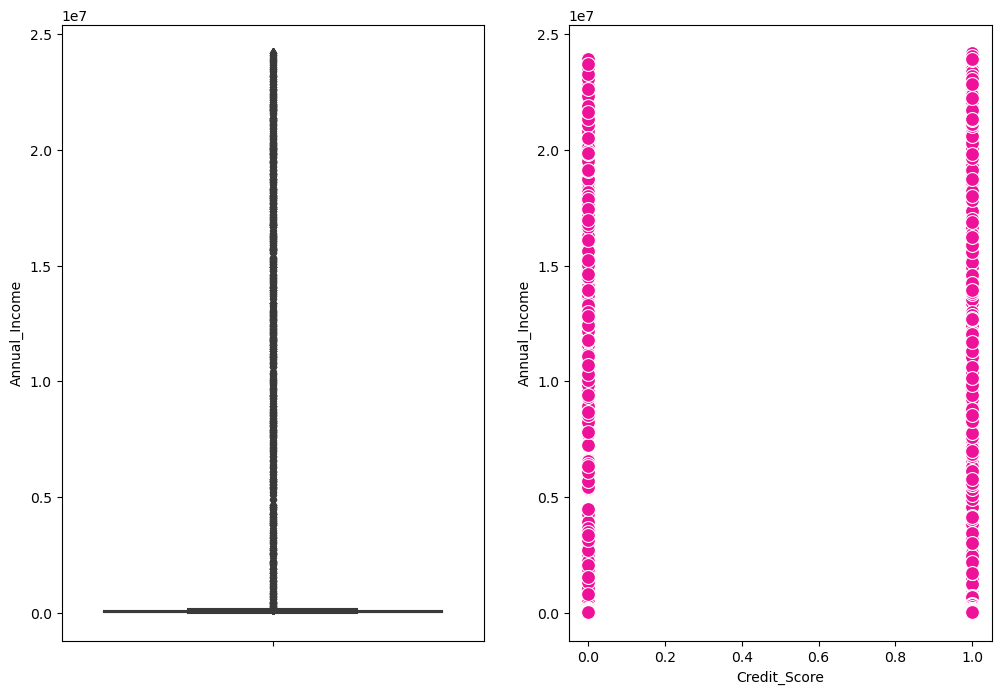

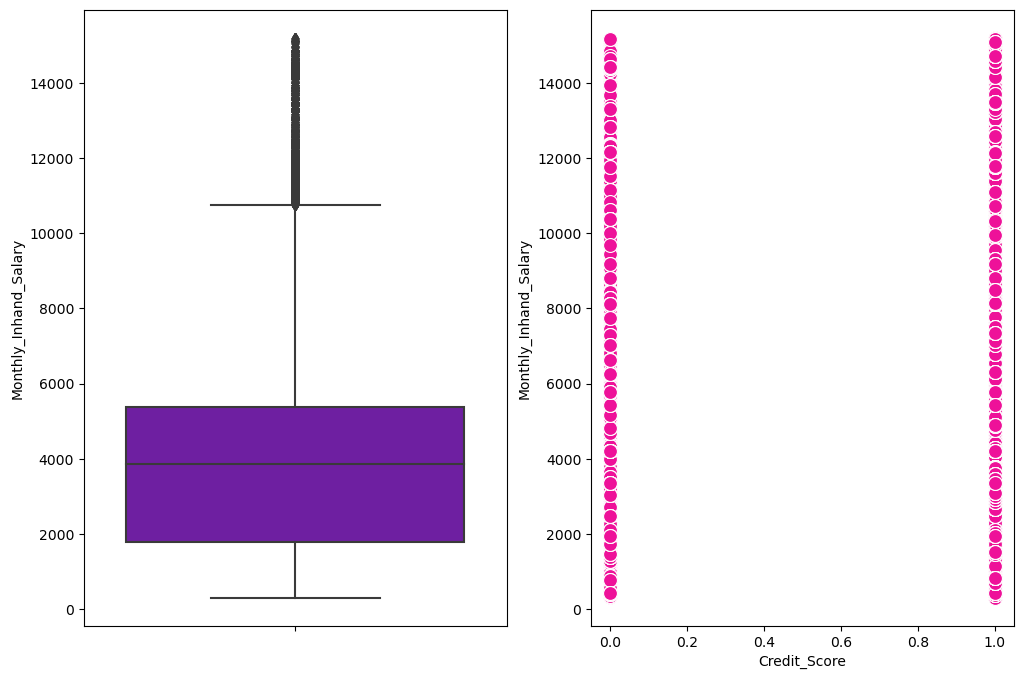

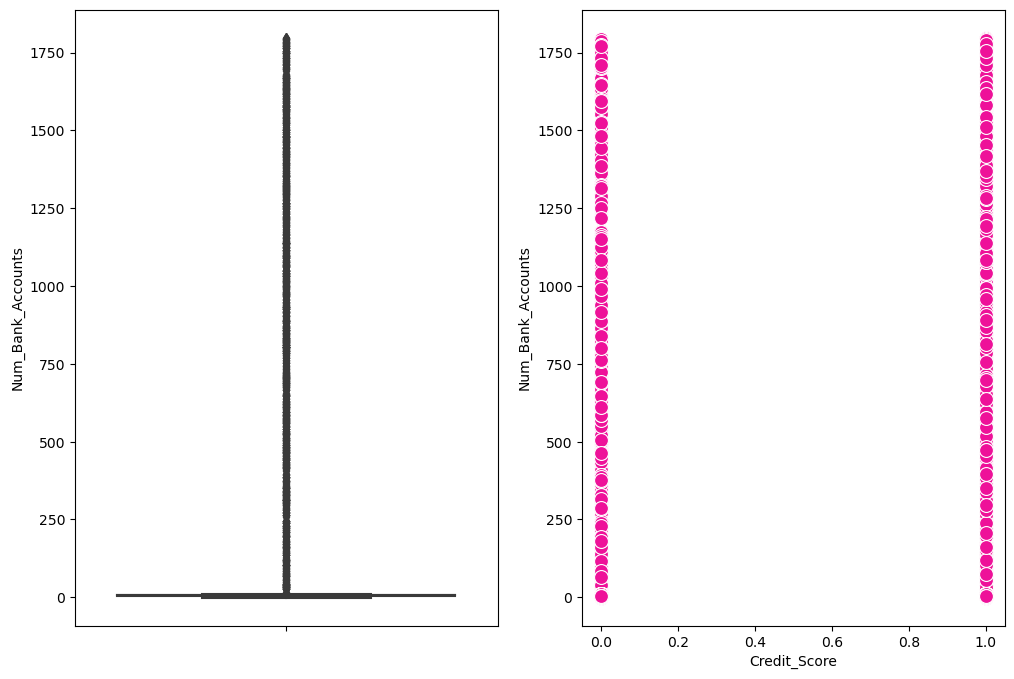

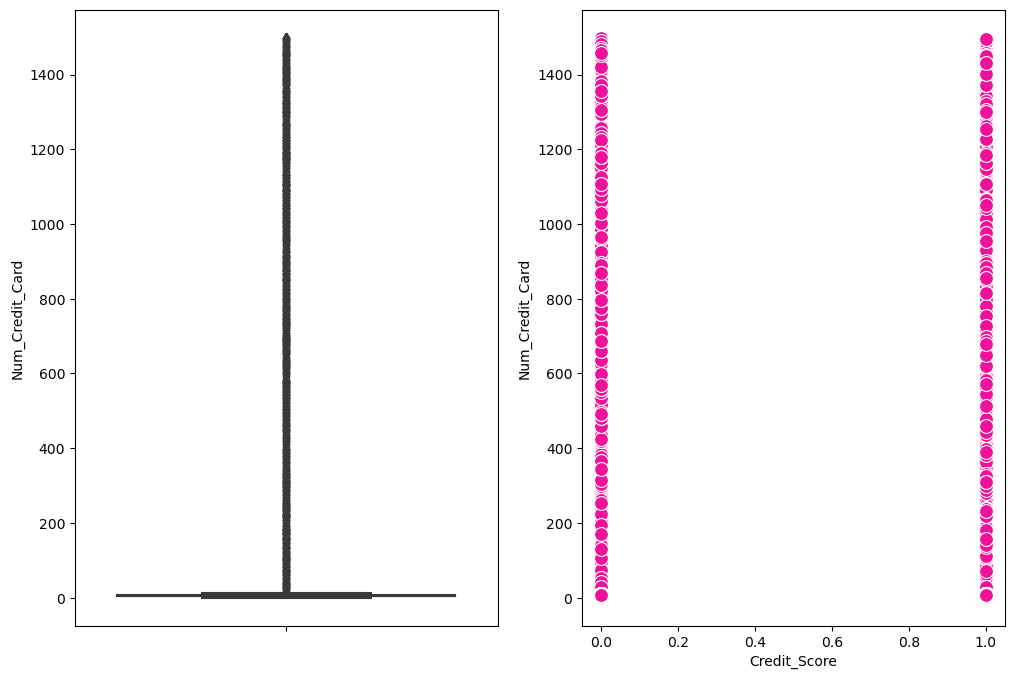

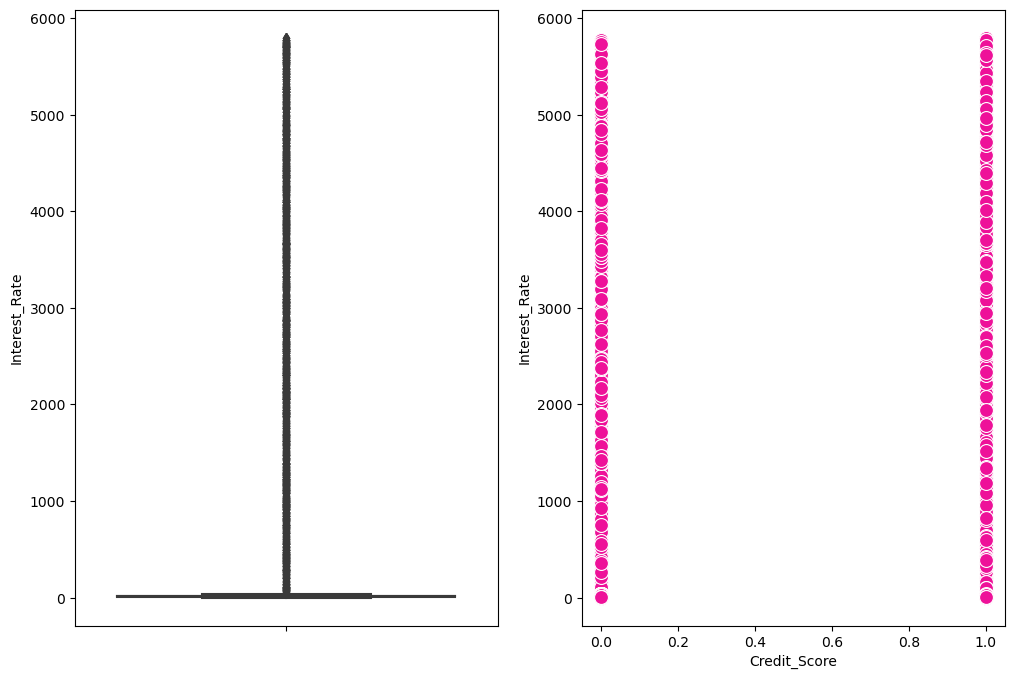

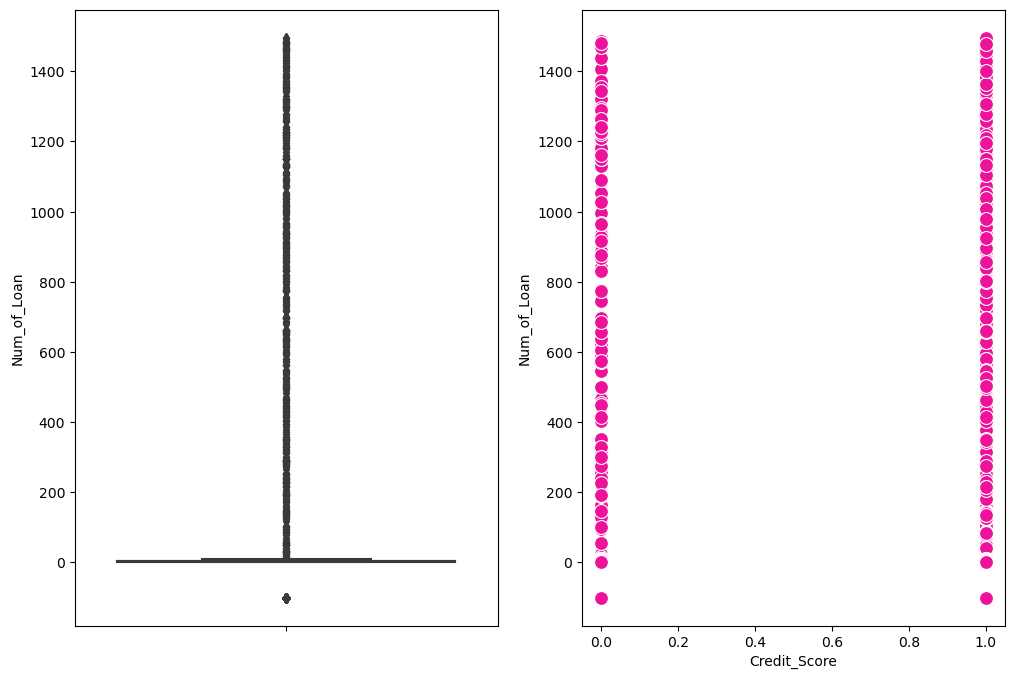

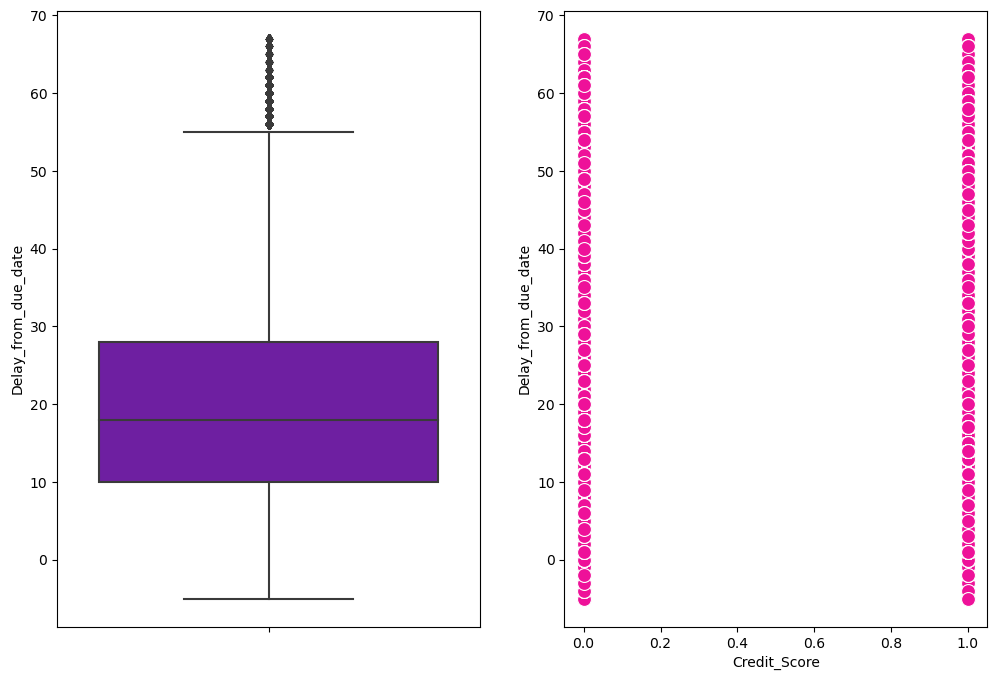

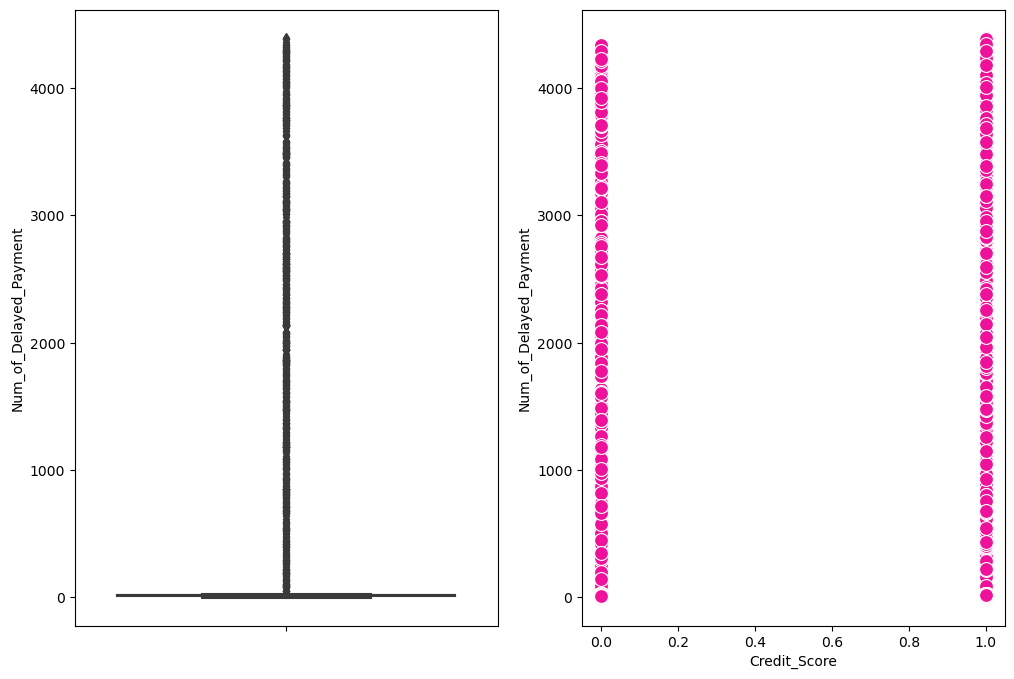

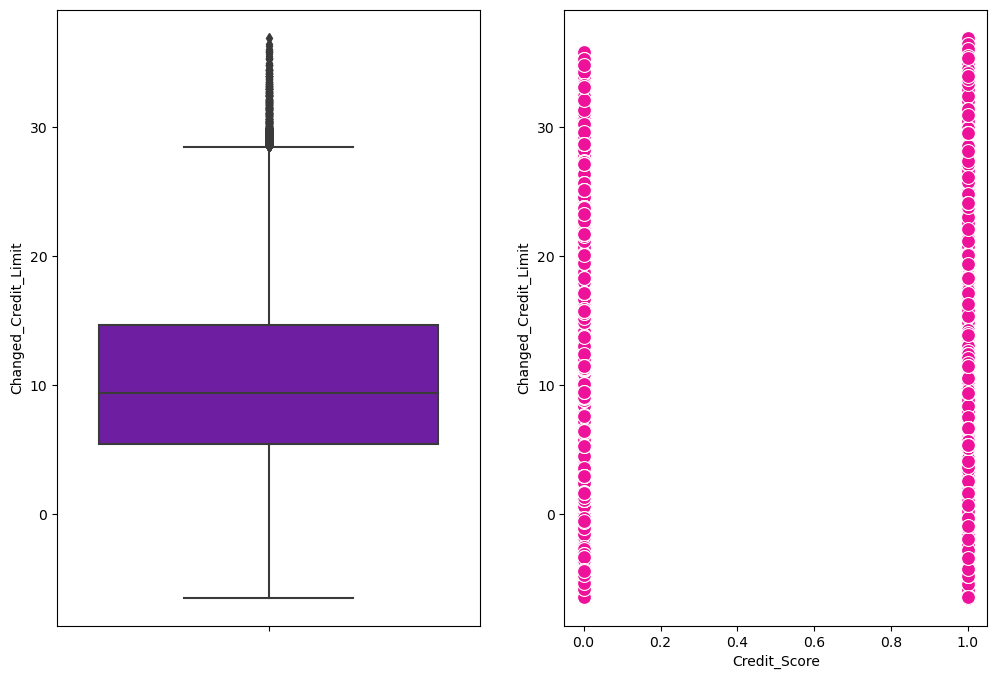

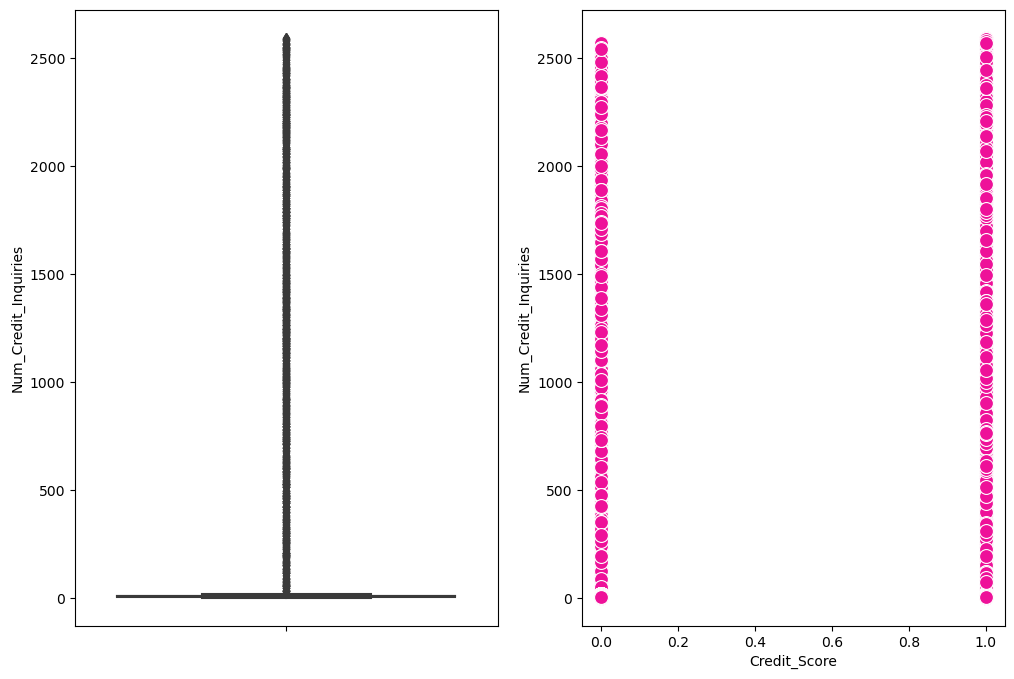

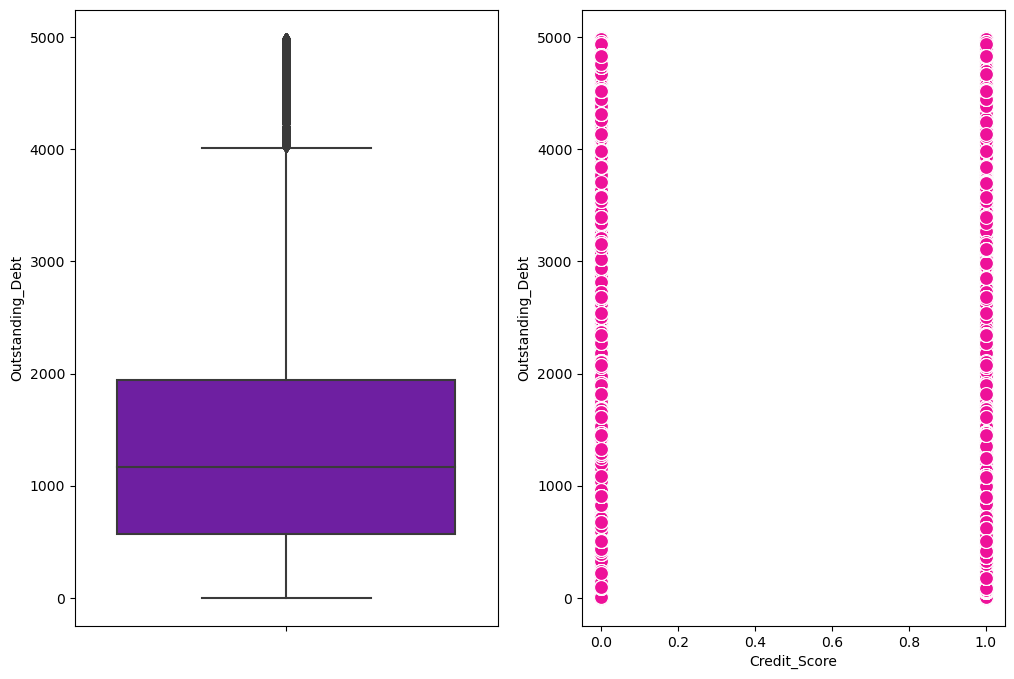

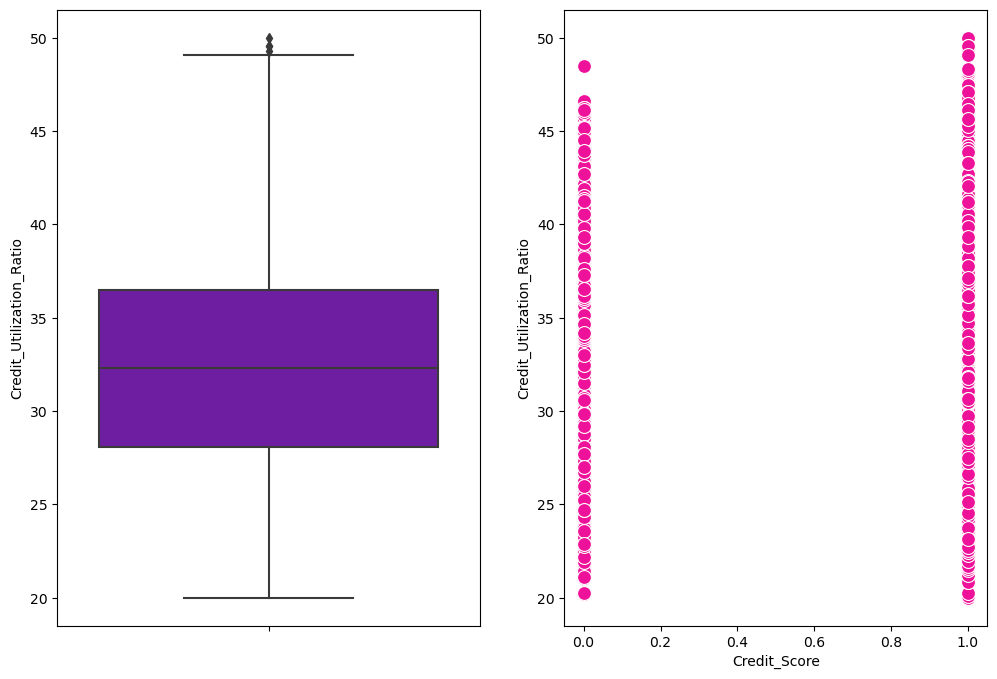

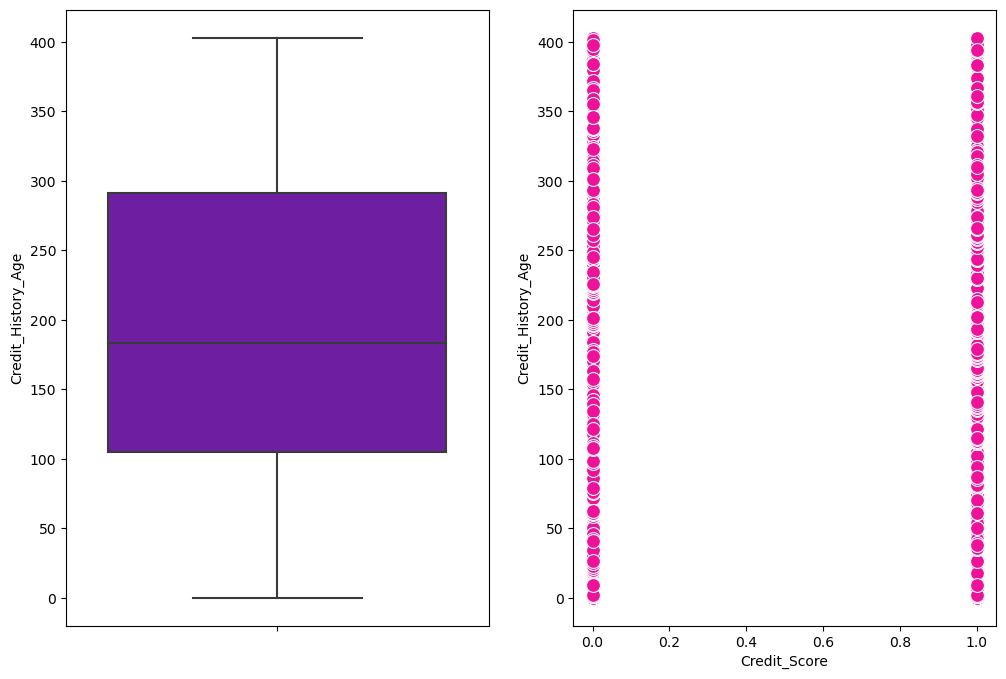

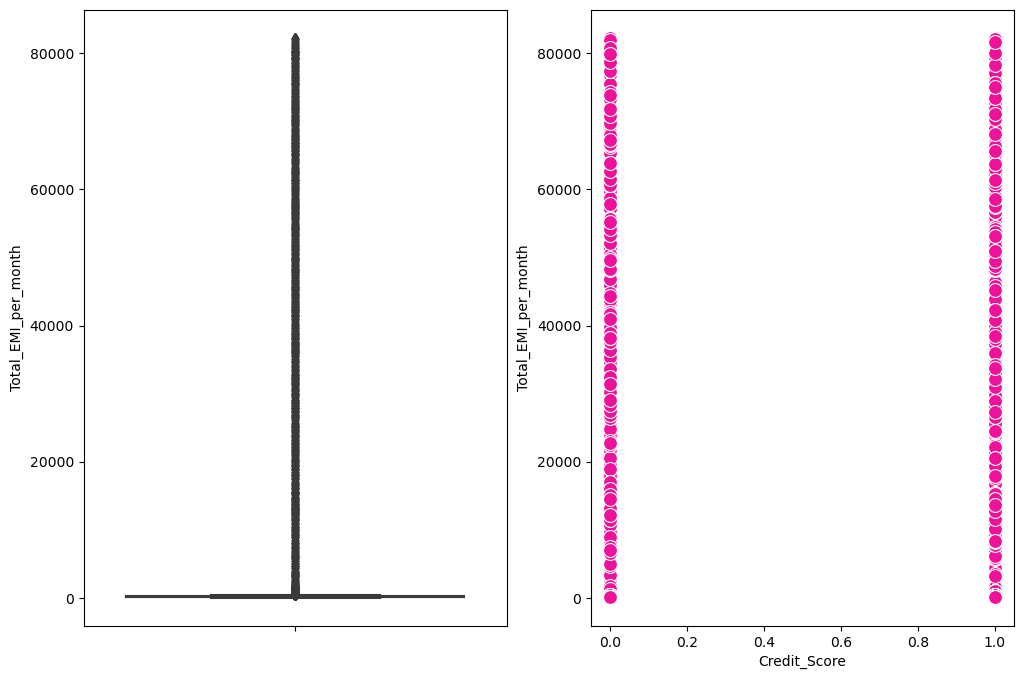

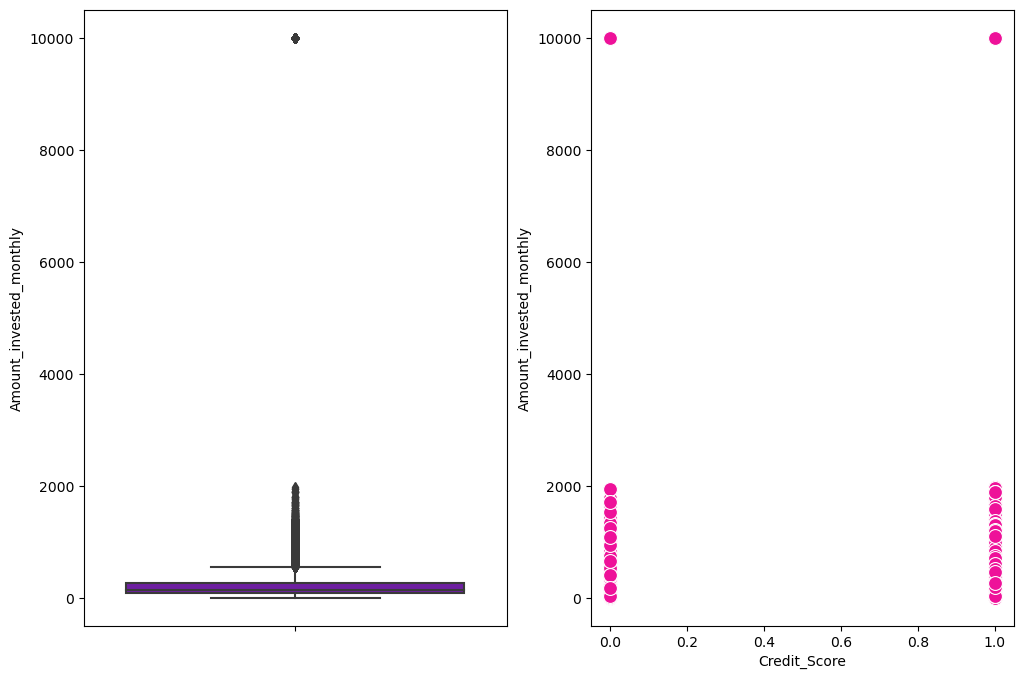

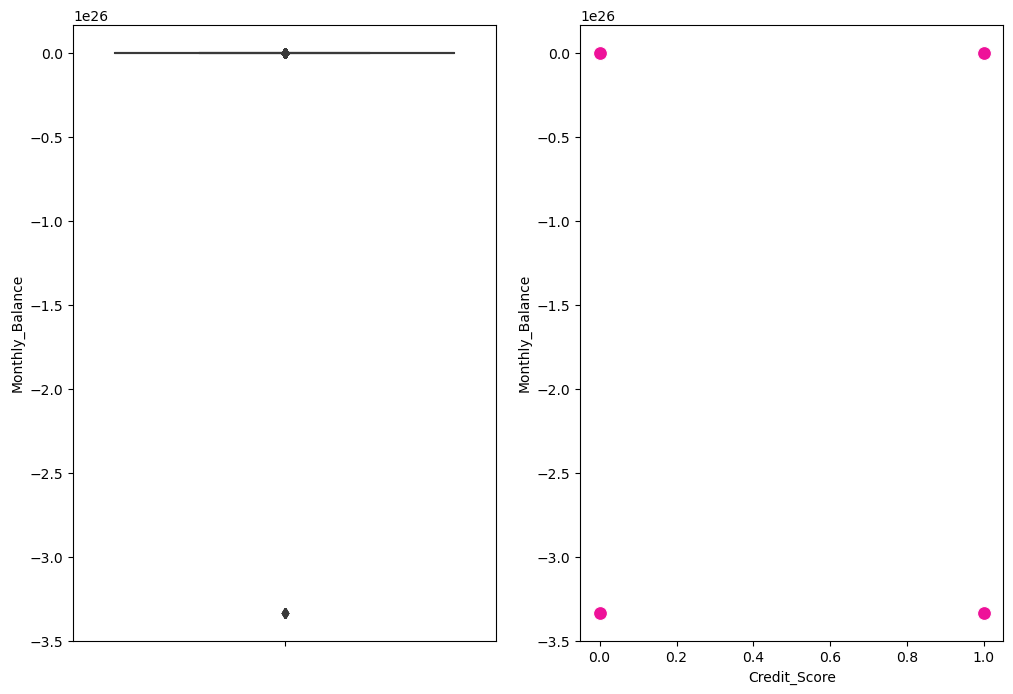

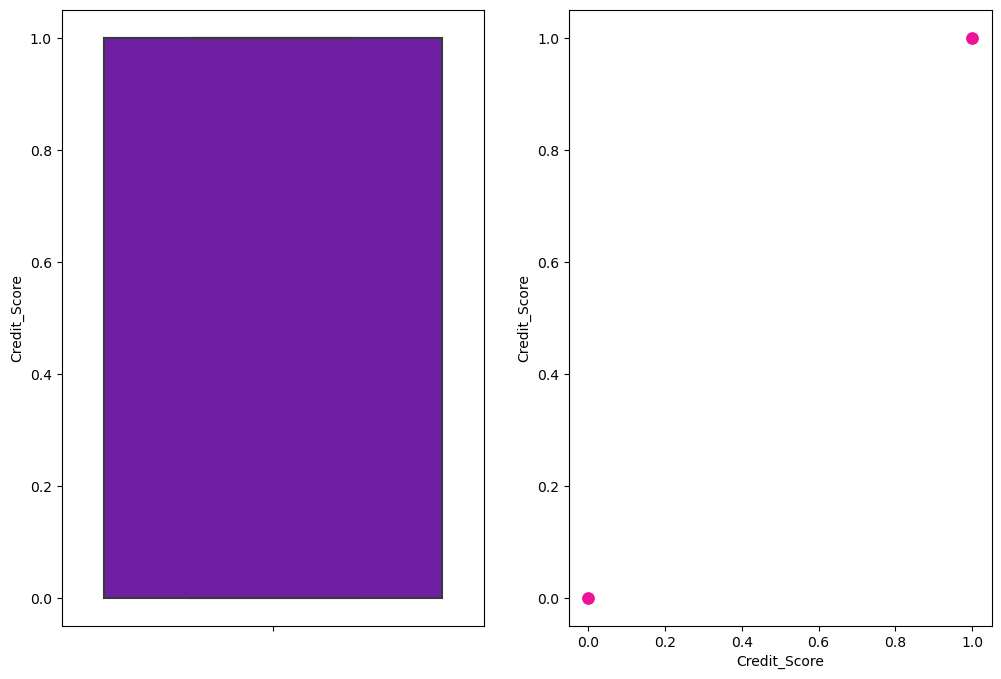

In [52]:
numCols = data.select_dtypes([np.number]).columns
for col in numCols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=data, y=col, ax=ax[0], color='#7209b7')
    sns.scatterplot(data=data,x = 'Credit_Score', s = 100, y=col, ax=ax[1], color ='#ee1199')
    plt.show()

In [53]:
data['Age'].describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

In [54]:
data = data[(data['Age'] >= 0) & (data['Age'] <= 100)]

In [55]:
data['Annual_Income'].mean()

176841.40556379606

In [56]:
(data['Annual_Income'] <= 240000).value_counts()

True     96249
False      975
Name: Annual_Income, dtype: int64

In [57]:
data = data[(data['Annual_Income'] <= 240000)]

In [58]:
(data['Monthly_Inhand_Salary'] <= 15000).value_counts()

True     96189
False       60
Name: Monthly_Inhand_Salary, dtype: int64

In [59]:
data = data[(data['Monthly_Inhand_Salary'] <= 15000)]

In [60]:
data['Num_Bank_Accounts'].median()

6.0

In [61]:
data = data[(data['Num_Bank_Accounts'] > 0)  & (data['Num_Bank_Accounts'] <= 10)]

In [62]:
data = data[(data['Num_Credit_Card'] <= 10)]

In [63]:
((data['Interest_Rate'] >= 0) & (data['Interest_Rate'] <= 300)).value_counts()

True     86940
False     1720
Name: Interest_Rate, dtype: int64

In [64]:
data['Interest_Rate'].median(), data['Interest_Rate'].mean()

(14.0, 73.41907286262125)

In [65]:
data['Interest_Rate'].describe()

count    88660.000000
mean        73.419073
std        470.136599
min          1.000000
25%          8.000000
50%         14.000000
75%         21.000000
max       5797.000000
Name: Interest_Rate, dtype: float64

In [66]:
data = data[(data['Interest_Rate'] <= 300)]

In [67]:
(data['Num_of_Loan'] <= 10).value_counts()

True     86531
False      409
Name: Num_of_Loan, dtype: int64

In [68]:
data['Num_of_Loan'].describe()

count    86940.000000
mean         3.041189
std         62.039317
min       -100.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [69]:
data['Num_of_Loan'].mean()

3.0411893259719345

In [70]:
data = data[(data['Num_of_Loan'] > 0)  & (data['Num_of_Loan'] <= 10)]

In [71]:
data['Delay_from_due_date'].describe()

count    74082.000000
mean        22.554980
std         15.260141
min         -5.000000
25%         11.000000
50%         20.000000
75%         29.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [72]:
(data['Delay_from_due_date'] <= 60).value_counts()

True     72966
False     1116
Name: Delay_from_due_date, dtype: int64

In [73]:
data = data[(data['Delay_from_due_date'] >= 0)&(data['Delay_from_due_date'] <= 60)]

In [74]:
(data['Num_of_Delayed_Payment'] <= 30).value_counts()

True     72108
False      532
Name: Num_of_Delayed_Payment, dtype: int64

In [75]:
data['Num_of_Delayed_Payment'].describe()

count    72640.000000
mean        30.466726
std        218.579058
min         -3.000000
25%         10.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [76]:
data = data[(data['Num_of_Delayed_Payment'] >= 0)&(data['Num_of_Delayed_Payment'] <= 30)]

In [77]:
(data['Changed_Credit_Limit'] <= 30).value_counts()

True     71524
False      220
Name: Changed_Credit_Limit, dtype: int64

In [78]:
data = data[(data['Changed_Credit_Limit'] <= 30)]

In [79]:
data['Num_Credit_Inquiries'].median()

6.0

In [80]:
(data['Num_Credit_Inquiries'] <= 30).value_counts()

True     70322
False     1202
Name: Num_Credit_Inquiries, dtype: int64

In [81]:
data = data[(data['Num_Credit_Inquiries'] <= 30)]

In [82]:
(data['Outstanding_Debt'] <= 4800).value_counts()

True     69500
False      822
Name: Outstanding_Debt, dtype: int64

In [83]:
data = data[(data['Outstanding_Debt'] <= 4800)]

In [84]:
(data['Credit_Utilization_Ratio'] <= 45).value_counts()

True     69442
False       58
Name: Credit_Utilization_Ratio, dtype: int64

In [85]:
data = data[(data['Credit_Utilization_Ratio'] <= 45)]

In [86]:
(data['Total_EMI_per_month'] <= 75000).value_counts()

True     69262
False      180
Name: Total_EMI_per_month, dtype: int64

In [87]:
data = data[(data['Total_EMI_per_month'] <= 75000)]

In [88]:
data['Monthly_Balance'].describe()

count    6.926200e+04
mean    -4.331379e+22
std      3.799508e+24
min     -3.333333e+26
25%      2.647605e+02
50%      3.244367e+02
75%      4.415460e+02
max      1.511917e+03
Name: Monthly_Balance, dtype: float64

In [89]:
data = data[(data['Monthly_Balance'] > 0)]

In [90]:
data.to_csv('train_pr.csv',
              index=False)

df_tr_pr = pd.read_csv('train_pr.csv',
                      low_memory=False)

# Convert strings to categories. (massive changes)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69253 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        69253 non-null  int64  
 1   Customer_ID               69253 non-null  int64  
 2   Month                     69253 non-null  int64  
 3   Name                      69253 non-null  object 
 4   Age                       69253 non-null  int64  
 5   SSN                       69253 non-null  object 
 6   Occupation                69253 non-null  object 
 7   Annual_Income             69253 non-null  float64
 8   Monthly_Inhand_Salary     69253 non-null  float64
 9   Num_Bank_Accounts         69253 non-null  int64  
 10  Num_Credit_Card           69253 non-null  int64  
 11  Interest_Rate             69253 non-null  int64  
 12  Num_of_Loan               69253 non-null  int32  
 13  Type_of_Loan              69253 non-null  object 
 14  Delay_

In [93]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
SSN
Occupation
Type_of_Loan
Credit_Mix
Payment_of_Min_Amount
Payment_Behaviour


In [94]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69253 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        69253 non-null  int64   
 1   Customer_ID               69253 non-null  int64   
 2   Month                     69253 non-null  int64   
 3   Name                      69253 non-null  category
 4   Age                       69253 non-null  int64   
 5   SSN                       69253 non-null  category
 6   Occupation                69253 non-null  category
 7   Annual_Income             69253 non-null  float64 
 8   Monthly_Inhand_Salary     69253 non-null  float64 
 9   Num_Bank_Accounts         69253 non-null  int64   
 10  Num_Credit_Card           69253 non-null  int64   
 11  Interest_Rate             69253 non-null  int64   
 12  Num_of_Loan               69253 non-null  int32   
 13  Type_of_Loan              69253 non-null  cate

### Correlation between independent variables

<AxesSubplot:>

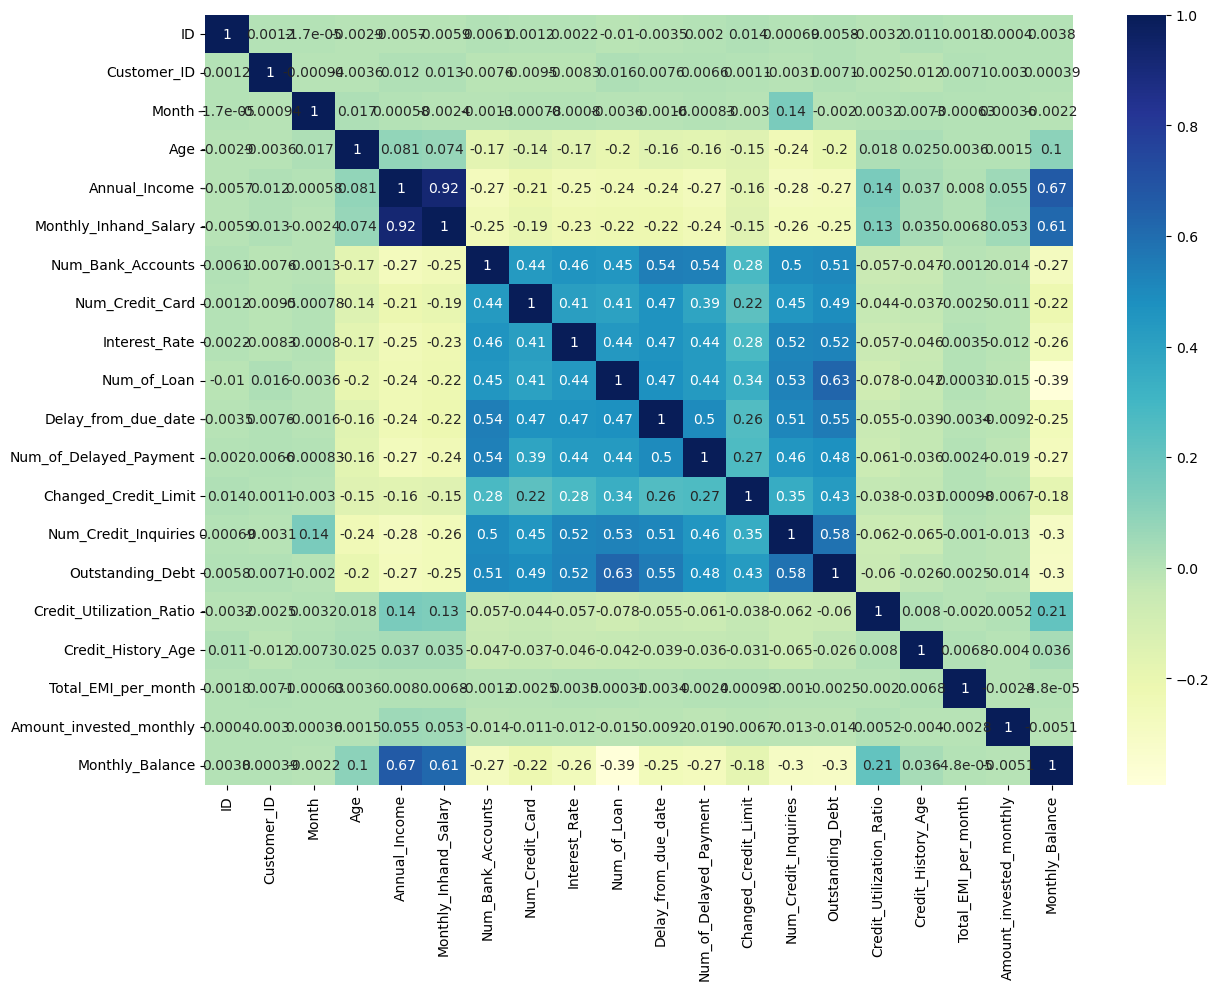

In [84]:
plt.figure(figsize = (14,10))
sns.heatmap(data.corr() , annot = True , cmap = "YlGnBu")

*A higher positive value means a potential positive correlation

*Negative correlation = a relationship between two variables in which one variable increases as the otrhe decreases

In [96]:
data.to_csv('train_pr.csv',
              index=False)
df_tr_pr = pd.read_csv('train_pr.csv',
                      low_memory=False)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69253 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        69253 non-null  int64   
 1   Customer_ID               69253 non-null  int64   
 2   Month                     69253 non-null  int64   
 3   Name                      69253 non-null  category
 4   Age                       69253 non-null  int64   
 5   SSN                       69253 non-null  category
 6   Occupation                69253 non-null  category
 7   Annual_Income             69253 non-null  float64 
 8   Monthly_Inhand_Salary     69253 non-null  float64 
 9   Num_Bank_Accounts         69253 non-null  int64   
 10  Num_Credit_Card           69253 non-null  int64   
 11  Interest_Rate             69253 non-null  int64   
 12  Num_of_Loan               69253 non-null  int32   
 13  Type_of_Loan              69253 non-null  cate

# 4.1 Feature selection

In [98]:
Credit_Score_le = le()
data['Credit_Score'] = Credit_Score_le.fit_transform(data['Credit_Score'])
round(abs(data.corr()['Credit_Score']*100).sort_values(ascending=False), 2)

Credit_Score                100.00
Num_Credit_Inquiries         39.71
Outstanding_Debt             36.79
Delay_from_due_date          36.22
Interest_Rate                35.87
Num_Credit_Card              34.04
Num_of_Loan                  30.10
Num_Bank_Accounts            30.05
Num_of_Delayed_Payment       24.65
Annual_Income                16.61
Monthly_Balance              16.12
Monthly_Inhand_Salary        15.23
Age                          12.35
Credit_History_Age            4.46
Changed_Credit_Limit          4.07
Credit_Utilization_Ratio      2.97
Amount_invested_monthly       0.84
Total_EMI_per_month           0.25
ID                            0.13
Customer_ID                   0.05
Month                         0.02
Name: Credit_Score, dtype: float64

<AxesSubplot:>

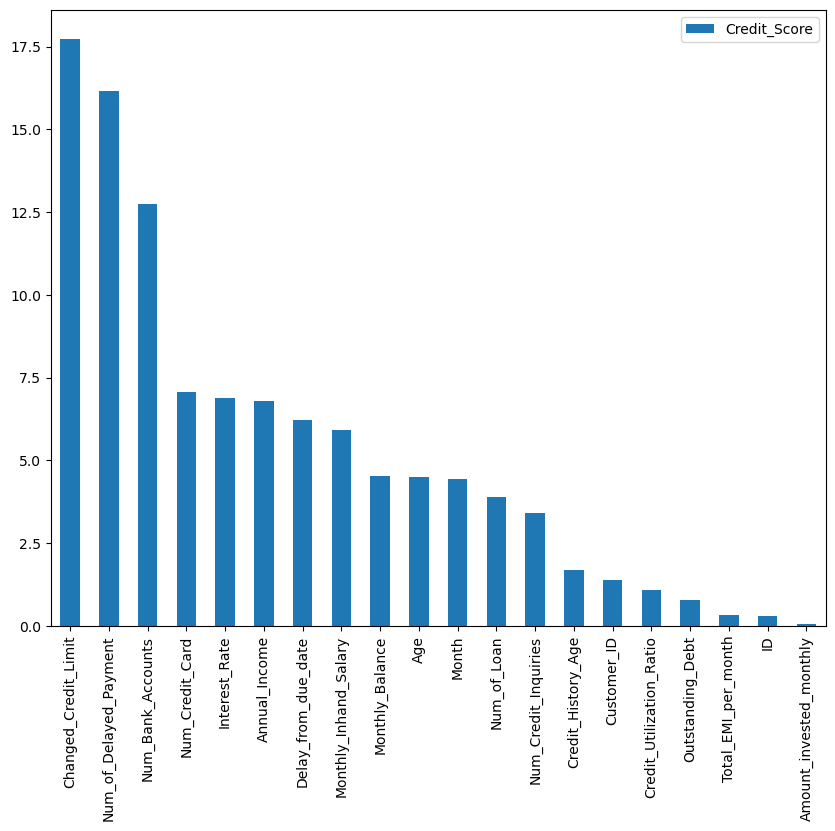

In [88]:
pd.DataFrame(abs(data.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

# 5. Modeling

In [99]:
ml = data[['Changed_Credit_Limit', 'Num_of_Delayed_Payment', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
           'Annual_Income', 'Delay_from_due_date', 'Monthly_Inhand_Salary', 'Monthly_Balance', 'Age', 'Month', 'Num_of_Loan',
           'Num_Credit_Inquiries', 'Credit_History_Age', 'Customer_ID', 'Credit_Utilization_Ratio', 'Outstanding_Debt',
           'Total_EMI_per_month', 'Amount_invested_monthly', 'ID', 'Credit_Score']]

In [100]:
ml.head()

,Changed_Credit_Limit,Num_of_Delayed_Payment,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Annual_Income,Delay_from_due_date,Monthly_Inhand_Salary,Monthly_Balance,Age,...,Num_of_Loan,Num_Credit_Inquiries,Credit_History_Age,Customer_ID,Credit_Utilization_Ratio,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,ID,Credit_Score
0,11.27,7.0,3,4,3,19114.12,3,1824.843333,312.494089,23,...,4,4.0,180,3392,26.822620,809.98,49.574949,80.415295,5634,1
3,6.27,4.0,3,4,3,19114.12,5,4194.170850,223.451310,23,...,4,4.0,185,3392,31.377862,809.98,49.574949,199.458074,5637,1
4,11.27,14.0,3,4,3,19114.12,6,1824.843333,341.489231,23,...,4,4.0,186,3392,24.797347,809.98,49.574949,41.420153,5638,1
5,9.27,4.0,3,4,3,19114.12,8,4194.170850,340.479212,23,...,4,4.0,187,3392,27.262259,809.98,49.574949,62.430172,5639,1
6,11.27,8.0,3,4,3,19114.12,3,1824.843333,244.565317,23,...,4,4.0,188,3392,22.537593,809.98,49.574949,178.344067,5640,1


In [101]:
# Split data into X & y
X = ml.drop('Credit_Score', axis=1)

y= ml['Credit_Score']

# Random seed for reproducibility
np.random.seed(0)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

<AxesSubplot:>

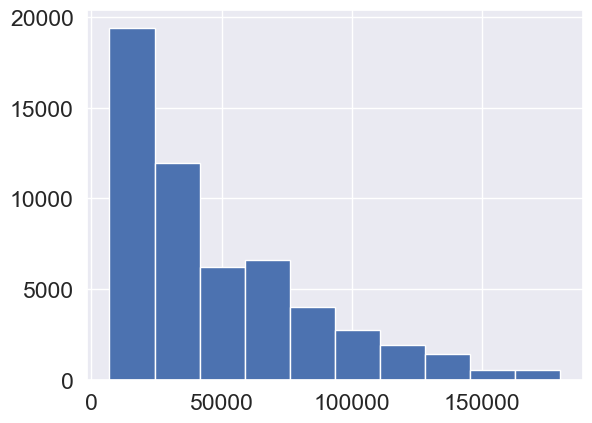

In [161]:
X_train.Annual_Income.hist()

In [103]:
y_train, len(y_train)

(12718    1
 98701    0
 10987    1
 80659    1
 92750    0
         ..
 30662    0
 66031    1
 61345    0
 62711    1
 98564    0
 Name: Credit_Score, Length: 55402, dtype: int64,
 55402)

In [105]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=3000, verbose=2),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(0)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [106]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.2s finished


{'KNN': 0.8352465525954804,
 'Logistic Regression': 0.7683921738502635,
 'Random Forest': 0.8836907082521117}

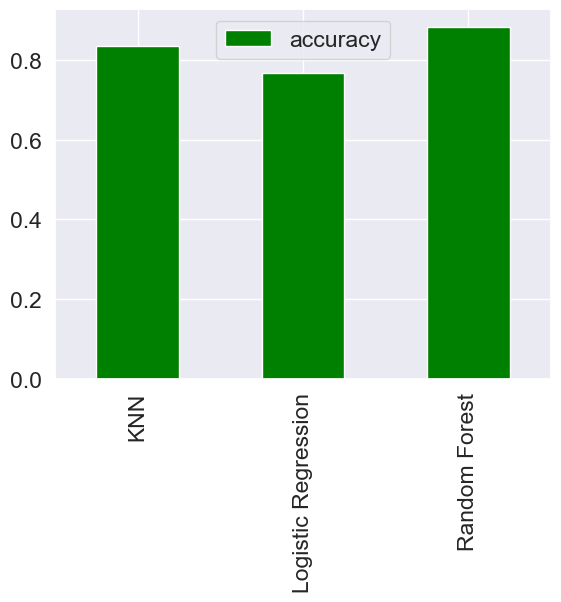

In [179]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color='green');

## Hyperparameter tuning (by hand)

In [108]:
# Create a list of train & test scores
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [109]:
train_scores

[1.0,
 0.9138298256380636,
 0.9147684199126386,
 0.8951662394859391,
 0.8924407061116927,
 0.8804736291108625,
 0.8710876863651131,
 0.8568463232374283,
 0.8421176130825602,
 0.828165048193206,
 0.8136709866069817,
 0.8048445904479983,
 0.7973358362513989,
 0.7900075809537562,
 0.7843760153063066,
 0.7784376015306307,
 0.7740875780657738,
 0.7720298906176672,
 0.7696653550413343,
 0.7665246741994873]

In [110]:
test_scores

[0.8352465525954804,
 0.8416720814381633,
 0.8458595047289005,
 0.8382788246336005,
 0.8352465525954804,
 0.8187134502923976,
 0.8107717854306549,
 0.7879575481914664,
 0.7840589127138835,
 0.7699805068226121,
 0.7687531586167063,
 0.758717782109595,
 0.7615334632878492,
 0.7530864197530864,
 0.753158616706375,
 0.7484658147426179,
 0.7468774817702692,
 0.7441339975453036,
 0.7418958919933579,
 0.7379250595624864]

Maximum KNN score on the test data: 84.59%


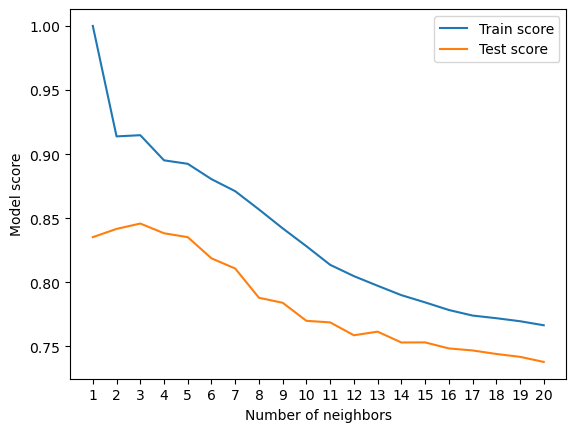

In [111]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Tuning models with with RandomizedSearchCV

In [112]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear", "saga"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [138]:
# Tune LogisticRegression

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=10,
                                verbose=True,
                                refit=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [139]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [140]:
%%time
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=5,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 6min 52s
Wall time: 7min 3s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [141]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [142]:
# Evaluate the randomized searchRandomForestClassifier model
rs_rf.score(X_test, y_test)

0.850480109739369

In [143]:
model_scores

{'KNN': 0.8352465525954804,
 'Logistic Regression': 0.7683921738502635,
 'Random Forest': 0.8836907082521117}

In [144]:
## Tuning a model with GridSearchCV

In [145]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [146]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [147]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.754169374052415

# Evaluating our tuned ml classifier, beyond accuracy

* ROC Curve and AUC score
* Confussion matrix
* Clssification report
* Precision
* Recall
* F1-score

## ROC Curve and AUC Scores

In [180]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [181]:
y_preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [182]:
y_test

96786    1
80271    1
51226    1
24565    1
34519    1
        ..
91916    1
61727    0
70651    1
10614    0
36115    1
Name: Credit_Score, Length: 13851, dtype: int64

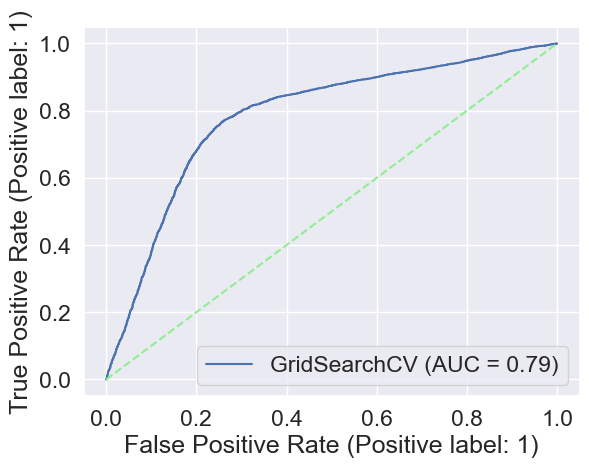

In [188]:
# Plot RCO Curve and calculate AUC metric

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);
plt.plot([0, 1], [0, 1], color='lightgreen', linestyle='--', label='Guessing');


* A true positive = model predicts 1 when truth is 1.
* A false positive = model predicts 1 when truth is 0.
* A true negative =  model precits 0 when truth is 0.
* A false negative =  model precits 0 when truth is 1.

This is great, the model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Let's move onto the next evaluation request, a confusion matrix.

##  Confussion Matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused)

In [189]:
print(confusion_matrix(y_test, y_preds))

[[ 997 3329]
 [2182 7343]]


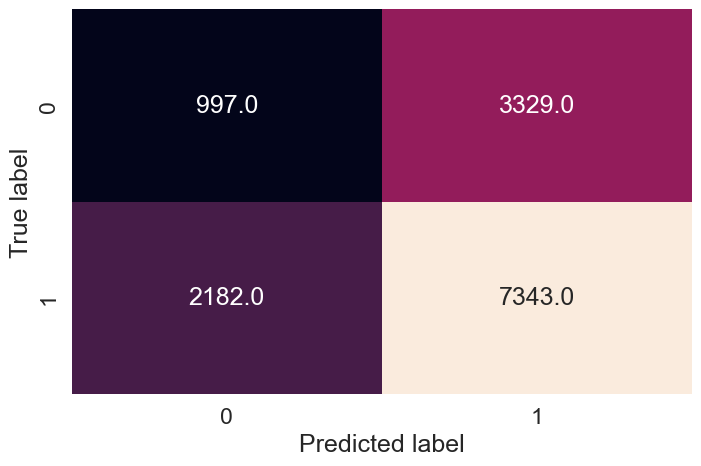

In [190]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(8, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                     fmt=".1f")
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

# Classification report
We can make a classification report using classification_report() and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [191]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.31      0.23      0.27      4326
           1       0.69      0.77      0.73      9525

    accuracy                           0.60     13851
   macro avg       0.50      0.50      0.50     13851
weighted avg       0.57      0.60      0.58     13851



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


### Calculate Evaluation Metrics using cross-validation

In [154]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [155]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=2.592943797404667,
                         solver="liblinear")

In [156]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.76673164, 0.77611725, 0.76319399, 0.76303249, 0.76584838])

In [157]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7669847502832492

In [158]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # accuracy as scoring
cv_precision = np.mean(cv_precision)
cv_precision

0.7993462143004519

In [192]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8828202164547652

In [193]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1") # accuracy as scoring
cv_f1 = np.mean(cv_f1)
cv_f1

0.8388722287130026

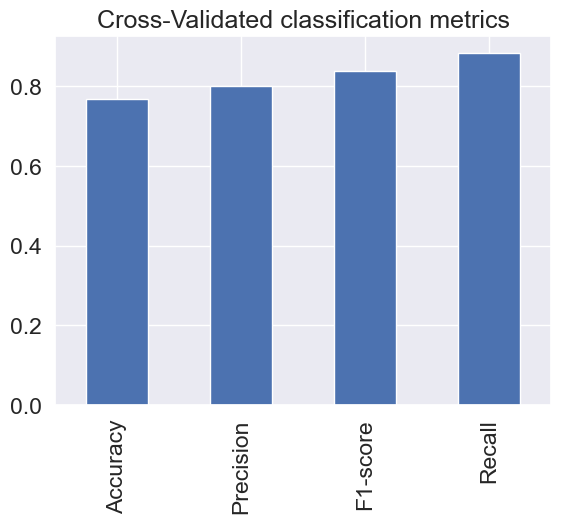

In [195]:
# Visualize cross-validated matrix
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision': cv_precision,
                           'F1-score': cv_f1,
                           'Recall': cv_recall},
                            index = [0])

cv_metrics.T.plot.bar(title='Cross-Validated classification metrics',
                      legend=False);